# Linear Regression from Scratch


### Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

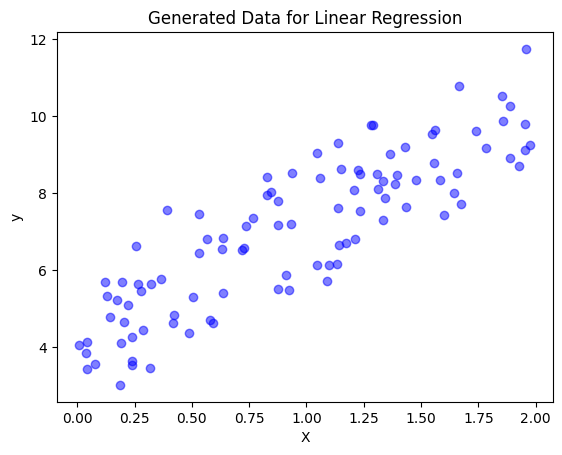

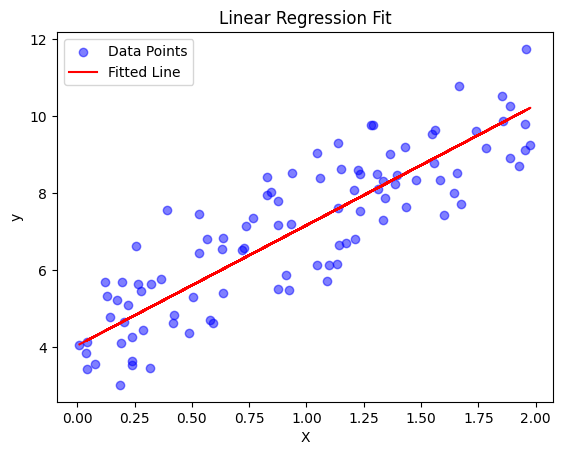

Mean Squared Error: 1.0015


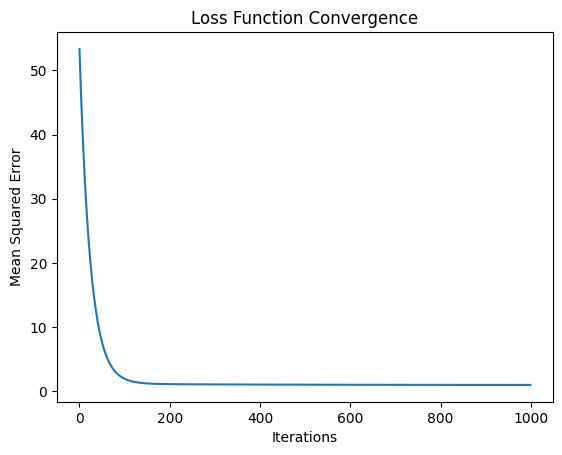

In [69]:
#Generate synthetic data for Linear Regression
np.random.seed(0)

# Generate random x values between 0 and 10
X = 2 * np.random.rand(100, 1)

# Create linear relationship y = 4 + 3 * X + Gaussian noise
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the generated data points
plt.scatter(X, y, color='blue', alpha=0.5)
plt.title("Generated Data for Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

"""
## Define Linear Regression Class
"""

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Get number of samples (n_samples) and number of features (n_features)
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        # Gradient Descent algorithm
        for _ in range(self.n_iterations):
            # Calculate predictions y_hat
            y_hat = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_hat - y))
            db = (1 / n_samples) * np.sum(y_hat - y)

            # Update weights and bias using gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Calculate predictions using the learned weights and bias
        return np.dot(X, self.weights) + self.bias

"""
## Train and Evaluate Linear Regression Model
"""

# Create an instance of the Linear Regression model
model = LinearRegressionScratch(learning_rate=0.01, n_iterations=1000)

# Train the model using our synthetic data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the original data and the fitted line
plt.scatter(X, y, color='blue', alpha=0.5, label="Data Points")
plt.plot(X, predictions, color='red', label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

"""
## Measure the Performance
"""

# Calculate the Mean Squared Error (MSE)
mse = np.mean((predictions - y) ** 2)
print(f"Mean Squared Error: {mse:.4f}")

"""
## Visualize the Loss Function Convergence (Optional)
"""

class LinearRegressionScratchWithLoss(LinearRegressionScratch):
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        super().__init__(learning_rate, n_iterations)
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for i in range(self.n_iterations):
            y_hat = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_hat - y))
            db = (1 / n_samples) * np.sum(y_hat - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate the Mean Squared Error and store it in loss_history
            mse = np.mean((y_hat - y) ** 2)
            self.loss_history.append(mse)

# Create an instance of the model with loss tracking
model_with_loss = LinearRegressionScratchWithLoss(learning_rate=0.01, n_iterations=1000)
model_with_loss.fit(X, y)

# Plot the loss convergence
plt.plot(model_with_loss.loss_history)
plt.title("Loss Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.show()


# Polynomial Regression from Scratch

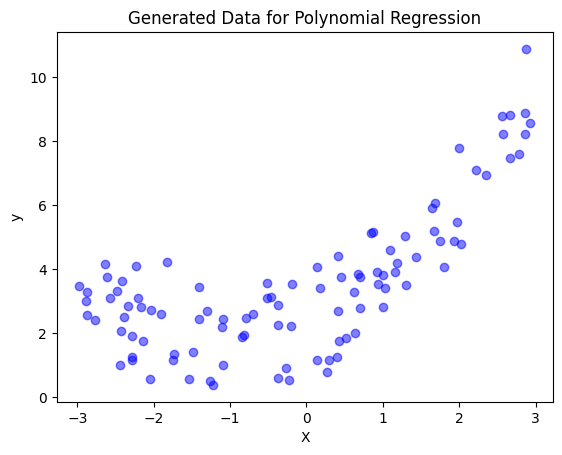

Shape of original X: (100, 1)
Shape of transformed X_poly (degree=2): (100, 3)


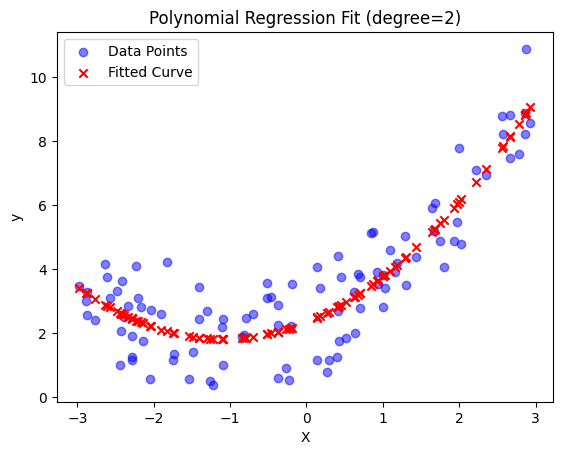

Mean Squared Error: 0.9736


<ipython-input-70-ad4898329448>:77: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.learning_rate * gradients


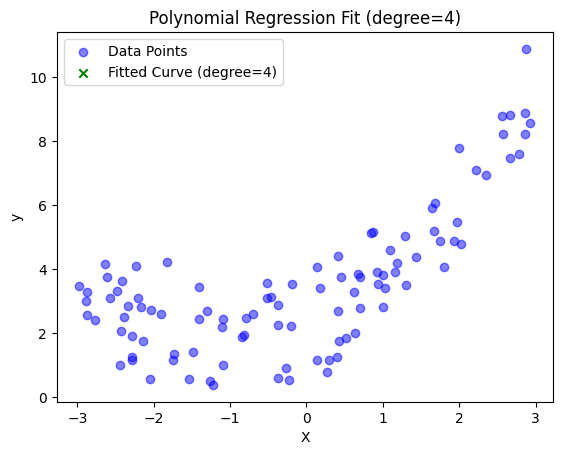

In [70]:
# Generate synthetic data for Polynomial Regression
np.random.seed(0)

# Generate random x values between -3 and 3

X = 6 * np.random.rand(100, 1) - 3

# Create a polynomial relationship y = 0.5 * X^2 + X + 2 + Gaussian noise
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

# Plot the generated data points
plt.scatter(X, y, color='blue', alpha=0.5)
plt.title("Generated Data for Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

"""
## Define a function for polynomial feature transformation
"""

def polynomial_features(X, degree):
    # Generate polynomial features up to the given degree
    X_poly = np.ones((X.shape[0], 1))  # Start with a column of ones (bias term)
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X**d))
    return X_poly

# Test polynomial feature transformation
degree = 2
X_poly = polynomial_features(X, degree)
print(f"Shape of original X: {X.shape}")
print(f"Shape of transformed X_poly (degree={degree}): {X_poly.shape}")

"""
## Define Polynomial Regression Class
"""

class PolynomialRegressionScratch:
    def __init__(self, degree=2, learning_rate=0.01, n_iterations=1000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None

    def fit(self, X, y):
        # Transform the original features to polynomial features
        X_poly = polynomial_features(X, self.degree)

        # Get number of samples and number of features
        n_samples, n_features = X_poly.shape

        # Initialize weights
        self.weights = np.zeros((n_features, 1))

        # Gradient Descent algorithm
        for _ in range(self.n_iterations):
            # Calculate predictions y_hat
            y_hat = np.dot(X_poly, self.weights)

            # Calculate gradients
            gradients = (2 / n_samples) * np.dot(X_poly.T, (y_hat - y))

            # Update weights
            self.weights -= self.learning_rate * gradients

    def predict(self, X):
        # Transform the original features to polynomial features
        X_poly = polynomial_features(X, self.degree)

        # Calculate predictions using the learned weights
        return np.dot(X_poly, self.weights)

"""
## Train and Evaluate Polynomial Regression Model
"""

# Create an instance of the Polynomial Regression model with degree 2
poly_model = PolynomialRegressionScratch(degree=2, learning_rate=0.01, n_iterations=1000)

# Train the model using our synthetic data
poly_model.fit(X, y)

# Make predictions
predictions = poly_model.predict(X)

# Plot the original data and the fitted polynomial curve
plt.scatter(X, y, color='blue', alpha=0.5, label="Data Points")
plt.scatter(X, predictions, color='red', label="Fitted Curve", marker='x')
plt.title("Polynomial Regression Fit (degree=2)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

"""
## Measure the Performance
"""

# Calculate the Mean Squared Error (MSE)
mse = np.mean((predictions - y) ** 2)
print(f"Mean Squared Error: {mse:.4f}")

"""
## Experiment with Higher-Degree Polynomials
"""

# Try fitting a polynomial regression model with degree 4
poly_model_high_degree = PolynomialRegressionScratch(degree=4, learning_rate=0.01, n_iterations=1000)
poly_model_high_degree.fit(X, y)
predictions_high_degree = poly_model_high_degree.predict(X)

# Plot the original data and the fitted polynomial curve (degree=4)
plt.scatter(X, y, color='blue', alpha=0.5, label="Data Points")
plt.scatter(X, predictions_high_degree, color='green', label="Fitted Curve (degree=4)", marker='x')
plt.title("Polynomial Regression Fit (degree=4)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


# Logistic Regression from Scratch

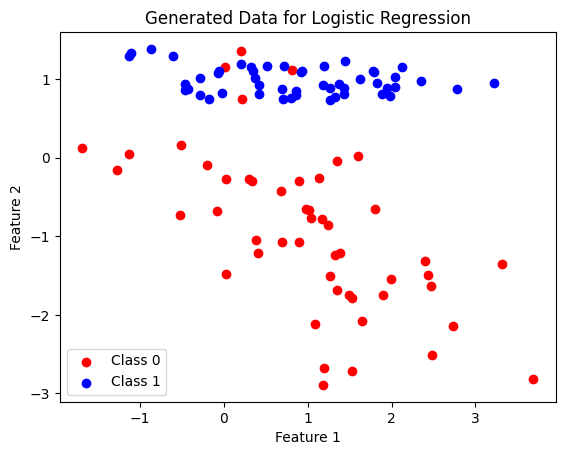

Accuracy: 94.00%


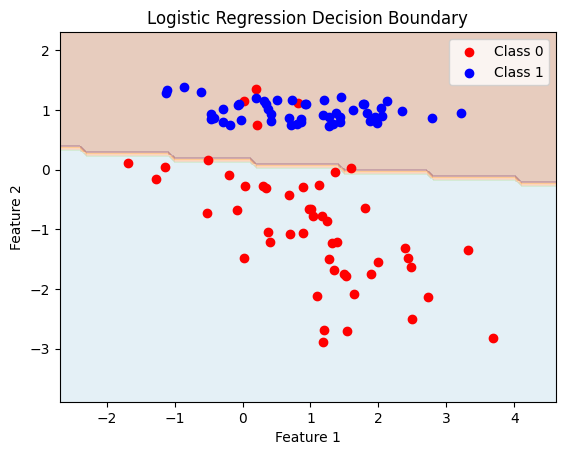

In [71]:
from sklearn.datasets import make_classification

# Generate synthetic data for Logistic Regression
np.random.seed(0)  # For reproducibility

# Generate a binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=0)
y = y.reshape(-1, 1)  # Reshape y to be a column vector

# Plot the generated data points
plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], color='blue', label='Class 1')
plt.title("Generated Data for Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

"""
## Define Logistic Regression Class
"""

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Get number of samples (n_samples) and number of features (n_features)
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        # Gradient Descent algorithm
        for _ in range(self.n_iterations):
            # Calculate linear model z = X*w + b
            z = np.dot(X, self.weights) + self.bias

            # Apply sigmoid function to get the predictions
            y_hat = self.sigmoid(z)

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_hat - y))
            db = (1 / n_samples) * np.sum(y_hat - y)

            # Update weights and bias using gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Calculate linear model z = X*w + b
        z = np.dot(X, self.weights) + self.bias

        # Apply sigmoid function to get the probabilities
        probabilities = self.sigmoid(z)

        # Return class labels based on a threshold of 0.5
        return (probabilities >= 0.5).astype(int)

"""
## Train and Evaluate Logistic Regression Model
"""

# Create an instance of the Logistic Regression model
model = LogisticRegressionScratch(learning_rate=0.01, n_iterations=1000)

# Train the model using our synthetic data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Calculate the accuracy
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

"""
## Visualize the Decision Boundary
"""

def plot_decision_boundary(X, y, model):
    # Create a meshgrid based on feature ranges
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Make predictions for the grid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid_points)
    predictions = predictions.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, predictions, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], color='blue', label='Class 1')
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, model)


# Linear Regression using Scikit-learn

In [74]:
from sklearn.linear_model import LinearRegression

# Sample data (replace with your actual data)
X = np.array([[1], [2], [3], [4], [5]])  # Features
y = np.array([2, 4, 5, 4, 5])  # Target variable

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
X_new = np.array([[6], [7]])
y_pred = model.predict(X_new)

print("Predictions:", y_pred)

Predictions: [5.8 6.4]


# Polynomial Regression using Scikit-learn

In [77]:
# Sample data (replace with your actual data)
X = np.array([[1], [2], [3], [4], [5]])  # Features
y = np.array([2, 4, 5, 4, 5])  # Target variable

# Create polynomial features (degree 2 in this example)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
X_new = np.array([[6], [7]])
X_new_poly = poly.transform(X_new)
y_pred = model.predict(X_new_poly)

print("Predictions:", y_pred)

Predictions: [3.8 2.4]


# Logistic Regression using Scikit-learn

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data (replace with your actual data)
X = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 2], [6, 4]])
y = np.array([0, 0, 0, 1, 1, 1])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5
